In [ ]:
# Class Imbalance: when one class has higher percentage
# Handling Technique:
# 1. Upsampling
# 2. Downsampling 
# 3. SMOTE

In [2]:
import pandas as pd
import numpy as np

np.random.seed(1) #for reproducibility of result

no_samples = 1000
class_0_ratio = 0.9
no_class_0 = int(no_samples*class_0_ratio)
no_class_1 = 100

In [3]:
no_class_0, no_class_1

(900, 100)

In [4]:
class_0 = {'feature1': np.random.normal(0, 1, no_class_0),
          'feature2': np.random.normal(0, 1, no_class_0),
          'target': [0]*no_class_0}

In [5]:
class_0 = pd.DataFrame(class_0)

In [6]:
class_0


,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [7]:
class_1 = pd.DataFrame({'feature1': np.random.normal(3, 1, no_class_1),
          'feature2': np.random.normal(3, 1, no_class_1),
          'target': [1]*no_class_1})

In [8]:
class_1

,feature1,feature2,target
0,1.692029,3.933630,1
1,4.472396,1.236225,1
2,3.074876,2.589783,1
3,1.213065,2.546333,1
4,3.165211,2.410570,1
...,...,...,...
95,3.213026,3.188583,1
96,2.195458,3.560918,1
97,2.353418,2.078341,1
98,4.138173,3.647375,1


In [9]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [10]:
df

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
995,3.213026,3.188583,1
996,2.195458,3.560918,1
997,2.353418,2.078341,1
998,4.138173,3.647375,1


In [11]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [ ]:
# Upsampling
df_minority = df[df.target == 1]
df_majority = df[df.target == 0]

In [13]:
df_majority

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [14]:
df_minority

,feature1,feature2,target
900,1.692029,3.933630,1
901,4.472396,1.236225,1
902,3.074876,2.589783,1
903,1.213065,2.546333,1
904,3.165211,2.410570,1
...,...,...,...
995,3.213026,3.188583,1
996,2.195458,3.560918,1
997,2.353418,2.078341,1
998,4.138173,3.647375,1


In [ ]:
# Replace: if replace is true, it means data point can be repeated
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, replace = True, n_samples= len(df_majority), random_state = 1)

In [16]:
df_minority_upsampled.shape

(900, 3)

In [17]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [18]:
df_upsampled.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [ ]:
# Downsampling
df_minority

,feature1,feature2,target
900,1.692029,3.933630,1
901,4.472396,1.236225,1
902,3.074876,2.589783,1
903,1.213065,2.546333,1
904,3.165211,2.410570,1
...,...,...,...
995,3.213026,3.188583,1
996,2.195458,3.560918,1
997,2.353418,2.078341,1
998,4.138173,3.647375,1


In [20]:
df_majority

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [21]:
df_majority_downsampled = resample(df_majority, replace = False, n_samples = len(df_minority), random_state=1)

In [22]:
df_majority_downsampled

,feature1,feature2,target
860,-0.977773,0.872579,0
880,0.309817,1.835870,0
874,0.050317,0.146532,0
780,0.677808,-0.859827,0
525,0.713049,0.320971,0
...,...,...,...
494,-1.579156,2.711950,0
255,-1.044589,0.522655,0
672,0.410266,0.683356,0
481,-1.114871,-0.800787,0


In [23]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

In [24]:
df_downsampled.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

In [ ]:
# SMOTE: SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE

In [26]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_redundant=0, n_features = 2, n_clusters_per_class=1, weights = [0.90])

In [27]:
 X

array([[-1.07876139,  0.6322917 ],
       [-1.62310799, -0.05386502],
       [-0.92187944,  1.34630462],
       ...,
       [-2.22214902, -1.74577853],
       [-0.9482506 ,  1.25173138],
       [-1.19836117,  1.37319785]], shape=(1000, 2))

In [28]:
y

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y, columns = ['target'])
final_df = pd.concat([df1, df2], axis = 1)

In [30]:
final_df

,f1,f2,target
0,-1.078761,0.632292,0
1,-1.623108,-0.053865,0
2,-0.921879,1.346305,0
3,-2.014224,0.242973,0
4,0.707407,0.382432,1
...,...,...,...
995,-1.617138,0.720443,0
996,-0.674183,1.593318,0
997,-2.222149,-1.745779,1
998,-0.948251,1.251731,0


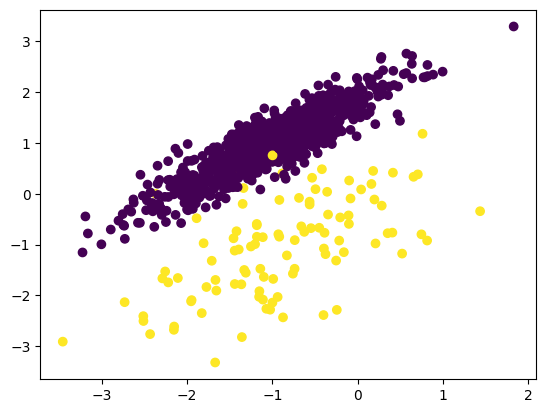

In [31]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'], final_df['f2'], c = final_df['target'])

In [33]:
!pip  install imblearn



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\wiryv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imblearn]



In [34]:
from imblearn.over_sampling import SMOTE
oversample  = SMOTE()

In [35]:
X, y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])

In [36]:
X.shape

(1794, 2)

In [37]:
df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y, columns = ['target'])
smote_df = pd.concat([df1, df2], axis = 1)

In [38]:
smote_df

,f1,f2,target
0,-1.078761,0.632292,0
1,-1.623108,-0.053865,0
2,-0.921879,1.346305,0
3,-2.014224,0.242973,0
4,0.707407,0.382432,1
...,...,...,...
1789,0.215346,-0.096199,1
1790,-0.999079,-0.136366,1
1791,-1.000188,0.752173,1
1792,-1.108114,-2.160650,1


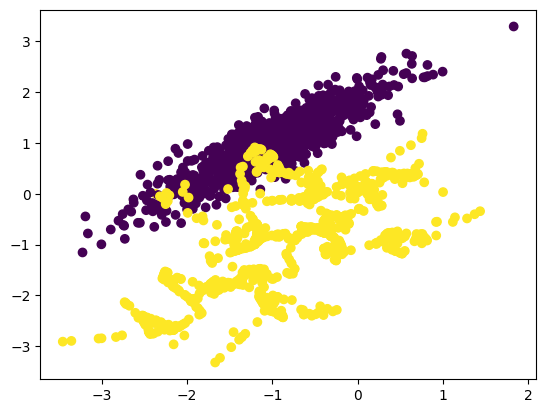

In [39]:
plt.scatter(smote_df['f1'], smote_df['f2'], c = smote_df['target'])